In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.dates as mdates
from datetime import date, timedelta

In [2]:
url = 'https://api.collection.cooperhewitt.org/rest/?method=cooperhewitt.exhibitions.getList&access_token=729cca8ffeb40cd2e725f5301e034134'
resp = requests.request('GET', url)
exhibition = json.loads(resp.text)
exhibition = pd.json_normalize(exhibition['exhibitions'])
exhibition['date_start'] = pd.to_datetime(exhibition['date_start'])
exhibition['date_end'].replace('0000-00-00', '2020-12-30', inplace=True)
exhibition['date_end'] = pd.to_datetime(exhibition['date_end'])
##filtering by the pens dates
exhibition= exhibition[exhibition['date_start'] >= '2014-10-01']
# exhibition.set_index(keys= ['date_start', 'title'], inplace=True)

db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 500)

In [4]:
def exhibition_again(oneactivity):
    start = oneactivity >= exhibition['date_start']
    end =  oneactivity <= exhibition['date_end']
    return list(exhibition[start & end]['title'])
    
    
results = pensActivity['created'].apply(exhibition_again)


In [8]:
results.to_csv('results.csv', encoding='utf-8', index=False)

In [5]:
pensActivity_exhibition = pensActivity.drop(['time_to_process', 'lastmodified', 'status_id', 'notes', 'activity'], axis=1)
pensActivity_exhibition['exhibition_info'] = results

In [6]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(pensActivity_exhibition['exhibition_info']).value_counts()

Hewitt Sisters Collect                                                                          643615
Making Design                                                                                   391553
Passion for the Exotic: Louis Comfort Tiffany and Lockwood de Forest                            306360
Pixar: The Design of Story                                                                      285037
Energizing the Everyday: Gifts From the George R. Kravis II Collection                          250522
Thom Browne Selects                                                                             217633
Process Lab: Citizen Design                                                                     215251
Passion for the Exotic: Lockwood de Forest, Frederic Church                                     206855
Beauty—Cooper Hewitt Design Triennial                                                           192223
Fragile Beasts                                                           

Text(0.5, 1.0, 'The exhibitions by pens activity')

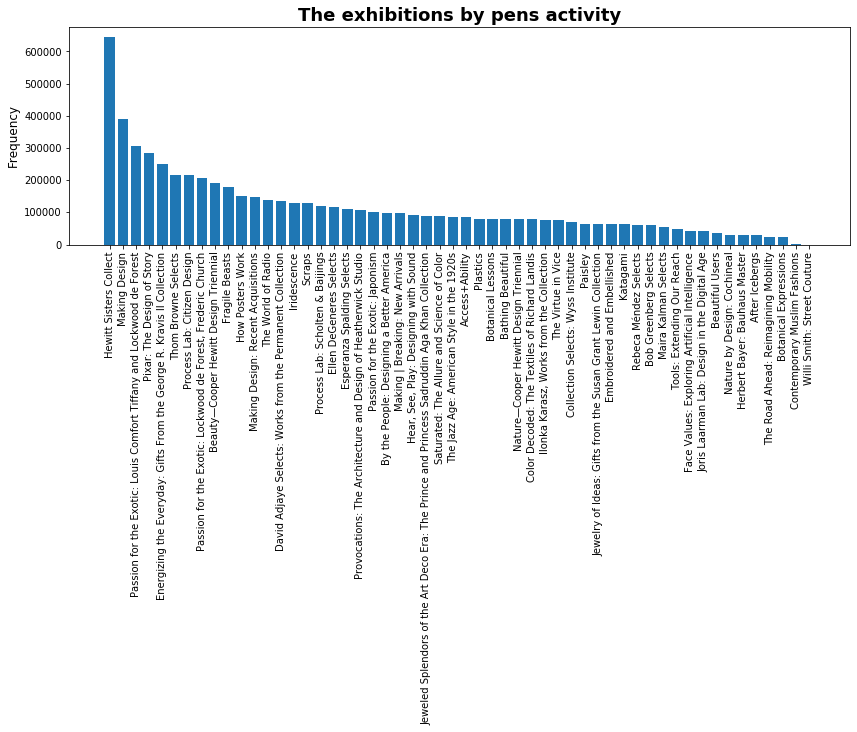

In [9]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(pensActivity_exhibition['exhibition_info']).value_counts().index,
        to_1D(pensActivity_exhibition['exhibition_info']).value_counts().values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Exhibition Title", size = 14)
plt.title('The exhibitions by pens activity', fontdict={'fontweight': 'bold', 'fontsize':18})
# plt.savefig('exhibition_activity.png', dpi=300)

In [10]:
pensActivity_exhibition.to_csv('pensActivity_exhibition.csv', encoding='utf-8', index=False)

In [11]:
pensActivity_exhibition

,visit_id,pen_id,fingerprint,created,count_items,exhibition_info
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,2014-12-15 15:32:19,2,"[Hewitt Sisters Collect, Making Design, Passion for the Exotic: Lockwood de Forest, Frederic Church, Maira Kalman Selects, Tools: Extending Our Reach, Beautiful Users]"
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,2014-12-15 15:52:19,7,"[Hewitt Sisters Collect, Making Design, Passion for the Exotic: Lockwood de Forest, Frederic Church, Maira Kalman Selects, Tools: Extending Our Reach, Beautiful Users]"
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,2014-12-15 15:56:09,5,"[Hewitt Sisters Collect, Making Design, Passion for the Exotic: Lockwood de Forest, Frederic Church, Maira Kalman Selects, Tools: Extending Our Reach, Beautiful Users]"
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,2014-12-15 15:56:30,6,"[Hewitt Sisters Collect, Making Design, Passion for the Exotic: Lockwood de Forest, Frederic Church, Maira Kalman Selects, Tools: Extending Our Reach, Beautiful Users]"
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,2014-12-15 15:58:11,6,"[Hewitt Sisters Collect, Making Design, Passion for the Exotic: Lockwood de Forest, Frederic Church, Maira Kalman Selects, Tools: Extending Our Reach, Beautiful Users]"
...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,2020-07-02 20:22:39,1,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,2020-07-06 17:42:37,1,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,2020-07-09 13:12:38,1,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,2020-07-09 13:16:52,1,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
